# DEA Notebook 

![alt text](../dea-gallery-crop.png "DEA")

### [DEA](https://dea.destine.eu/web) is a Content creation service and no-code platform for DestinE storytelling and data visualization

# Generate a Map markers with locations in CZML

This notebook guides you to the generation of a simple marker map of places in Vienna.

The steps included in the follow are:
- EXTRA: generates a base64 image to be used in CZML for locally stored images
- Defines detailed metadata (name, photo, description, administrative info, external links) for selected places in Vienna,
- Generates a CZML file with labelled icons for each place, styled for display in DEA

### Load modules

In [3]:
import orjson
from pathlib import Path
import base64

### Transform png to base64

In [4]:
# Path to file
image_path = Path("pin_cities.png")

# Convert to base64
with image_path.open("rb") as f:
    image_bytes = f.read()

# Codify base64 and generate data URI
base64_str = base64.b64encode(image_bytes).decode("utf-8")
data_uri = f"data:image/png;base64,{base64_str}"


### Define metadata

In [5]:
place_info = [
    {
        "name": "Historic Centre of Vienna (UNESCO)",
        "fstate": "Wien",
        "district": "Innere Stadt",
        "lat": 48.20849,
        "lon": 16.37208,
        "url": "https://whc.unesco.org/en/list/1033/",
        "photo": "	https://whc.unesco.org/uploads/thumbs/site_1033_0006-750-750-20151104154612.jpg",
        "description": "The Historic Centre of Vienna is a UNESCO World Heritage Site known for its rich architectural ensembles, including Baroque castles, gardens, and the late-19th-century Ringstraße."
    },
    {
        "name": "Palace and Gardens of Schönbrunn (UNESCO)", 
        "fstate": "Vienna", 
        "district": "Hietzing", 
        "lat": 48.1845, 
        "lon": 16.3122,
        "url": "https://whc.unesco.org/en/list/786/", 
        "photo": "https://upload.wikimedia.org/wikipedia/commons/thumb/8/83/Neptune_Fountain_Sch%C3%B6nbrunn.jpg/512px-Neptune_Fountain_Sch%C3%B6nbrunn.jpg",
        "description": "18th‑century imperial Rococo complex with palace, gardens, and the world’s oldest zoo (Zoo‑Schonbrunn). UNESCO since 1996."
    },
    {
        "name": "Ferris Wheel Legacy", 
        "fstate": "Wien", 
        "district": "Breitenfurt, Liesing", 
        "lat": 48.2167, 
        "lon": 16.3960,
        "url": "https://www.wien.info/en/see-do/prater/experience-prater-345598#11/48.2075/16.3747",
        "photo": "https://upload.wikimedia.org/wikipedia/commons/thumb/3/30/Wien_Riesenrad.jpg/512px-Wien_Riesenrad.jpg", 
        "description": "The Wiener Riesenrad, located in the Prater, is one of the world's oldest Ferris wheels and a symbol of Vienna."
    }, 
    {
        "name": "Wiener Prater",
        "fstate": "Wien",
        "district": "Leopoldstadt",
        "lat": 48.194558,
        "lon": 16.430054,
        "url": "https://de.wikipedia.org/wiki/Wiener_Prater",
        "photo": "https://upload.wikimedia.org/wikipedia/commons/thumb/7/7a/Wien_02_Prater_Mauthnerwasser_a.jpg/512px-Wien_02_Prater_Mauthnerwasser_a.jpg",
        "description": "The Prater is a large public park in Vienna, home to the famous Riesenrad Ferris wheel, meadows, forests, and sports facilities."
    },
    {
        "name": "Vienna Woods (Wienerwald)",
        "fstate": "Wien",
        "district": "Various (e.g. Penzing, Liesing)",
        "lat": 48.205,
        "lon": 16.2,
        "url": "https://www.bpww.at/en/node/82",
        "photo": "https://upload.wikimedia.org/wikipedia/commons/8/8d/Wienerwald2.jpg",
        "description": "The Vienna Woods are a UNESCO biosphere reserve forming the northeastern foothills of the Alps, offering diverse habitats and traditional cultural landscapes."
    },
    {
        "name": "Austria Centre Vienna",
        "fstate": "Wien",
        "district": "Leopoldstadt",
        "lat": 48.234722, 
        "lon": 16.416944,
        "url": "https://www.acv.at/en/",
        "photo": "https://upload.wikimedia.org/wikipedia/commons/thumb/5/52/Wien_-_Austria_Center.JPG/512px-Wien_-_Austria_Center.JPG",
        "description": "Austria Center Vienna (ACV) is the nation’s largest conference center, hosting global events and congresses in the heart of Vienna's Donau City."
    },
    {
        "name": "Grinzing Wine Village",
        "fstate": "Wien",
        "district": "Döbling",
        "lat": 48.255,
        "lon": 16.333,
        "url": "https://www.grinzland.com/heuriger-en",
        "photo": "https://upload.wikimedia.org/wikipedia/en/e/e9/Grinzing_wappen.png",
        "description": "Grinzing is a historic wine village in Vienna known for its centuries-old Heurigen (wine taverns) and traditional Viennese wine culture nestled in the vineyards."
    }
]


### Generate and save czml

In [6]:
# Use base64 image as a pointer (otherwise, the web address of the pointer to use)
pointer_icon = data_uri

# start document
czml = [
    {
        "id": "document",
        "name": "Vienna",
        "version": "1.0"
    }
]

# add places
for place in place_info:
    name = place["name"]
    fstate = place["fstate"]
    district = place["district"]
    photo = place["photo"]
    url = place["url"]
    description = place["description"]
    lat = place["lat"]
    lon = place["lon"]

    html_desc = f"""
    <div style='min-height:360px; min-width:300px; text-align:center;'>
        <img src='{photo}' style='max-height:256px;'><br><br>
        <div style='text-align:left; padding: 0 10px;'>
            <b></b> {description}<br>
            <b></b><br>
            <b>Federal State:</b> {fstate}<br>
            <b>District:</b> {district}<br>
            <b>More info on the area:</b> <a href="{url}" target="_blank">{url}</a>
        </div>
    </div>
    """

    czml.append({
        "id": f"site-{name.replace(' ', '_')}",
        "name": name,
        "position": {
            "cartographicDegrees": [lon, lat, 0]
        },
        "label": {
            "text": name,
            "font": "16px sans-serif",
            "fillColor": {"rgba": [255, 215, 0, 255]},
            "outlineColor": {"rgba": [0, 0, 0, 255]},
            "outlineWidth": 2,
            "style": "FILL_AND_OUTLINE",
            "horizontalOrigin": "CENTER",
            "verticalOrigin": "BOTTOM",
            "pixelOffset": {"cartesian2": [0, -30]},
            "scale": 1.0,
            "distanceDisplayCondition": {"distanceDisplayCondition": [0, 1000000]}
        },
        "billboard": {
            "image": pointer_icon,
            "scale": 0.25,
            "verticalOrigin": "BOTTOM"
        },
        "description": html_desc
    })

# Save CZML
with open("Vienna_map.czml", "wb") as f:
    f.write(orjson.dumps(czml))

print("File correctly saved!")

File correctly saved!


### We are ready to upload the file in DEA

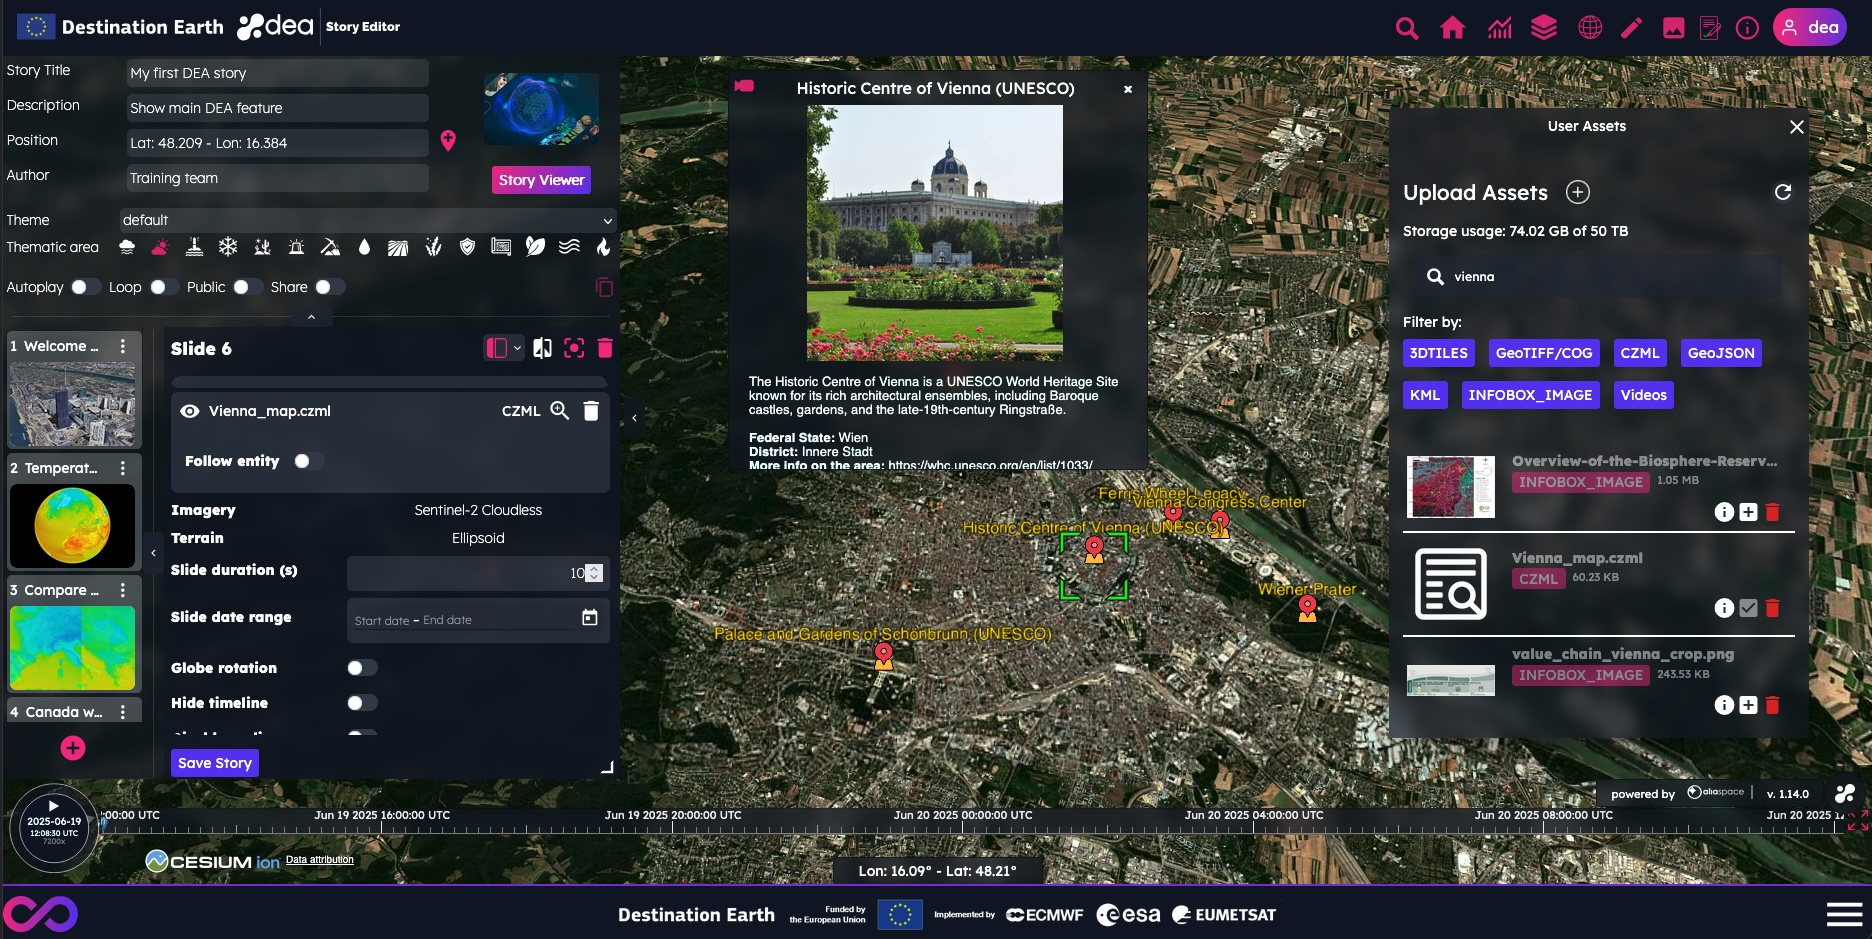